# JOBarcelona 23 | Data Science

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
from numpy import *
import pandas as pd

sns.set_style('darkgrid')

# Lectura de los datos

In [2]:
train = pd.read_csv('./Data/train.csv', index_col=[0])
test = pd.read_csv('./Data/test.csv', index_col=[0])

In [3]:
train.head()

,CLIENTNUM,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,...,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Attrition_Flag
train_idx,,,,,,,,,,,,,,,,,,,,,
0,713071383,54,F,1,Unknown,Single,Unknown,Blue,36,1,...,3,3723.0,1728,1995.0,0.595,8554,99,0.678,0.464,1
1,714246333,58,F,4,High School,Married,Unknown,Blue,48,1,...,3,5396.0,1803,3593.0,0.493,2107,39,0.393,0.334,0
2,718206783,45,F,4,Unknown,Single,Less than $40K,Gold,36,6,...,3,15987.0,1648,14339.0,0.732,1436,36,1.250,0.103,1
3,721096983,34,F,2,Graduate,Single,Less than $40K,Blue,36,4,...,4,3625.0,2517,1108.0,1.158,2616,46,1.300,0.694,1
4,720028683,49,F,2,High School,Married,$40K - $60K,Blue,39,5,...,4,2720.0,1926,794.0,0.602,3806,61,0.794,0.708,1


In [4]:
test.head()

,CLIENTNUM,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
test_idx,,,,,,,,,,,,,,,,,,,,
0,719455083,48,F,3,Uneducated,Single,Less than $40K,Blue,39,4,3,4,2991.0,1508,1483.0,0.703,3734,64,0.882,0.504
1,773503308,59,M,1,Uneducated,Single,Less than $40K,Blue,53,5,5,4,2192.0,1569,623.0,0.706,4010,79,0.717,0.716
2,715452408,37,F,2,Graduate,Divorced,Less than $40K,Blue,36,4,3,3,1734.0,987,747.0,0.879,4727,67,0.914,0.569
3,711264033,47,M,3,Doctorate,Divorced,$40K - $60K,Blue,36,4,2,3,4786.0,1516,3270.0,0.940,4973,74,0.850,0.317
4,718943508,42,M,3,Unknown,Single,$80K - $120K,Blue,33,3,3,2,3714.0,2170,1544.0,0.524,1454,35,0.522,0.584


In [5]:
train.Attrition_Flag.value_counts() # DESbalanceada

1    6801
0    1300
Name: Attrition_Flag, dtype: int64

Primer problema con el que nos encontramos, gran desproporción de la variable objetivo, tendremos que recurrir a técnicas de sampleo.

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8101 entries, 0 to 8100
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 8101 non-null   int64  
 1   Customer_Age              8101 non-null   int64  
 2   Gender                    8101 non-null   object 
 3   Dependent_count           8101 non-null   int64  
 4   Education_Level           8101 non-null   object 
 5   Marital_Status            8101 non-null   object 
 6   Income_Category           8101 non-null   object 
 7   Card_Category             8101 non-null   object 
 8   Months_on_book            8101 non-null   int64  
 9   Total_Relationship_Count  8101 non-null   int64  
 10  Months_Inactive_12_mon    8101 non-null   int64  
 11  Contacts_Count_12_mon     8101 non-null   int64  
 12  Credit_Limit              8101 non-null   float64
 13  Total_Revolving_Bal       8101 non-null   int64  
 14  Avg_Open

# Preprocesamiento

In [7]:
''' recategorizacion de variables '''
train['Card_Category'] = train['Card_Category'].apply(lambda x: 0 if x == 'Blue' else 1) # 0 si es Blue 1 en caso contrario
test['Card_Category'] = test['Card_Category'].apply(lambda x: 0 if x == 'Blue' else 1)
train['Gender'] = train['Gender'].apply(lambda x: 0 if x == 'M' else 1) # 0 es M , 1 es F
test['Gender'] = test['Gender'].apply(lambda x: 0 if x == 'M' else 1)

In [8]:
categorical_cols = [cname for cname in train.columns if train[cname].dtype == "object"]
print(f'categorical cols : {categorical_cols}')

categorical cols : ['Education_Level', 'Marital_Status', 'Income_Category']


In [9]:
# pasamos a numerico para que podamos usar smote
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in categorical_cols:
    train[i] = le.fit_transform(train[i])
    test[i] = le.transform(test[i])

# Balanceo de la Target

In [10]:
X = train.copy()
y = X.pop("Attrition_Flag")

In [11]:
from imblearn.over_sampling import SMOTE

# transform the dataset
oversample = SMOTE(random_state=0, k_neighbors= int(sqrt(train.shape[0])))
X, y = oversample.fit_resample(X, y)

In [12]:
# summarize the new class distribution
y.value_counts()

1    6801
0    6801
Name: Attrition_Flag, dtype: int64

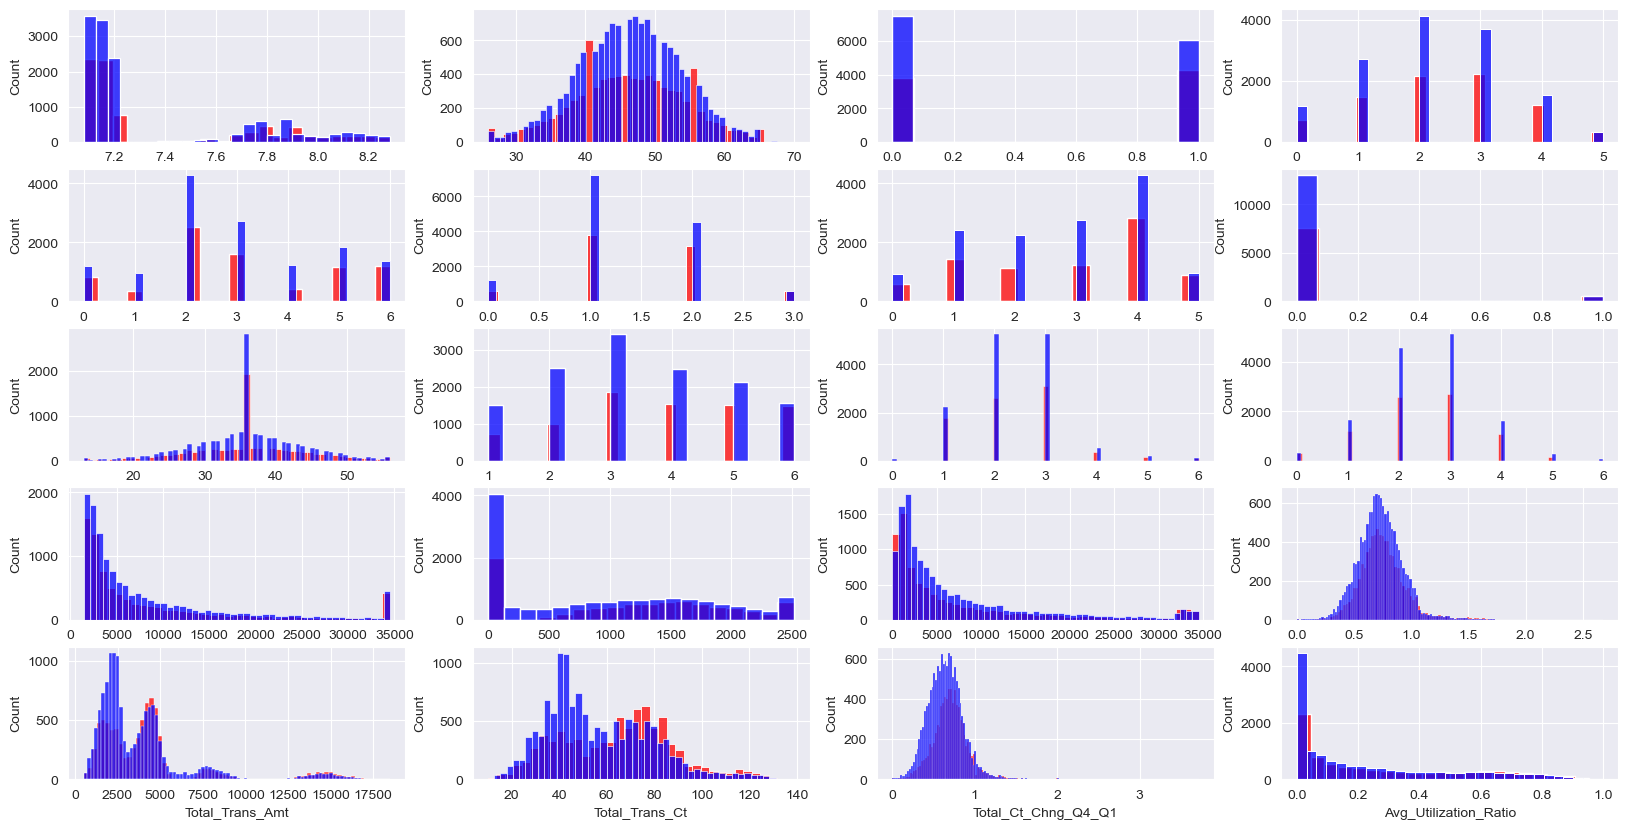

In [13]:
# vemos el cambio que supuso el smote
fig, ax = plt.subplots(5, 4, figsize=(20, 10))
for var, subplot in zip(X.columns, ax.flatten()):
    sns.histplot(x = var, color = 'r', data = train, ax = subplot)
    sns.histplot(x = var, color = 'b', data = X, ax = subplot)

In [14]:
''' transformacion yeo-jhonson '''
from sklearn.preprocessing import PowerTransformer

yeo = PowerTransformer()
yeocols = ['Avg_Open_To_Buy','Avg_Utilization_Ratio', 'Total_Trans_Ct', 'Total_Revolving_Bal', 'Months_Inactive_12_mon', 'Customer_Age', 'Dependent_count', 'Months_on_book', 'Contacts_Count_12_mon', 'Total_Amt_Chng_Q4_Q1', 'Gender', 'Card_Category', 'Total_Relationship_Count']

X[yeocols] = pd.DataFrame(yeo.fit_transform(X[yeocols]))
test[yeocols] = pd.DataFrame(yeo.transform(test[yeocols]))
X['Credit_Limit'] = log(X['Credit_Limit'])
test['Credit_Limit'] = log(test['Credit_Limit'])

In [15]:
''' dummies y scaler '''
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

numerical_cols = list(set(X.columns)-set(categorical_cols))
print(f'numerical cols : {numerical_cols}')

yeo = PowerTransformer(standardize=True)
sc = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore', sparse=False, drop = 'first')

preprocessor = ColumnTransformer(
    transformers=[
        ('num',sc, numerical_cols), # estandarizamos las continuas
        ('cat',categorical_transformer, categorical_cols) # pasamos a dummies las categóricas
    ])

numerical cols : ['Months_on_book', 'Total_Revolving_Bal', 'Total_Relationship_Count', 'Total_Trans_Ct', 'Avg_Open_To_Buy', 'Contacts_Count_12_mon', 'Card_Category', 'CLIENTNUM', 'Total_Amt_Chng_Q4_Q1', 'Avg_Utilization_Ratio', 'Customer_Age', 'Months_Inactive_12_mon', 'Total_Trans_Amt', 'Total_Ct_Chng_Q4_Q1', 'Dependent_count', 'Gender', 'Credit_Limit']


In [16]:
# eliminamos los prefijos num y cat para los nombres de las columnas
preprocessor.fit(X)
names = []
for i in preprocessor.get_feature_names_out():
    names.append(i[5:])

In [17]:
Xtrain = pd.DataFrame(preprocessor.fit_transform(X))
Xtrain.columns = names

Xtest = pd.DataFrame(preprocessor.transform(test))
Xtest.columns = names

Xtrain.drop(['CLIENTNUM'],axis = 1, inplace= True)
Xtest.drop(['CLIENTNUM'],axis = 1, inplace= True)

In [32]:
Xtrain.head()

,Months_on_book,Total_Revolving_Bal,Total_Relationship_Count,Total_Trans_Ct,Avg_Open_To_Buy,Contacts_Count_12_mon,Card_Category,Total_Amt_Chng_Q4_Q1,Avg_Utilization_Ratio,Customer_Age,...,Education_Level_5,Education_Level_6,Marital_Status_1,Marital_Status_2,Marital_Status_3,Income_Category_1,Income_Category_2,Income_Category_3,Income_Category_4,Income_Category_5
0,-0.006995,0.861772,-1.731872,1.675570,-0.598095,0.470153,-0.208178,-0.668468,1.139573,1.036605,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1.662426,0.895561,-1.731872,-0.750865,-0.116842,0.470153,-0.208178,-1.264903,0.796298,1.592597,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,-0.006995,0.824579,1.602601,-0.936294,1.083871,0.470153,4.803575,0.057098,-0.279174,-0.195599,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,-0.006995,1.176384,0.425996,-0.357387,-1.062535,1.444793,-0.208178,1.898802,1.520259,-1.660726,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.401545,0.948905,1.031469,0.350768,-1.318515,1.444793,-0.208178,-0.629407,1.537242,0.348674,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [33]:
Xtest.head()

,Months_on_book,Total_Revolving_Bal,Total_Relationship_Count,Total_Trans_Ct,Avg_Open_To_Buy,Contacts_Count_12_mon,Card_Category,Total_Amt_Chng_Q4_Q1,Avg_Utilization_Ratio,Customer_Age,...,Education_Level_5,Education_Level_6,Marital_Status_1,Marital_Status_2,Marital_Status_3,Income_Category_1,Income_Category_2,Income_Category_3,Income_Category_4,Income_Category_5
0,0.401545,0.756327,0.425996,0.475801,-0.834360,1.444793,-0.208178,-0.089964,1.222737,0.212082,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,2.383564,0.786588,1.031469,1.040372,-1.501615,1.444793,-0.208178,-0.074597,1.546702,1.732339,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,-0.006995,0.454389,0.425996,0.596370,-1.364834,0.470153,-0.208178,0.755104,1.340664,-1.266141,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,-0.006995,0.760344,0.425996,0.862212,-0.195032,0.470153,-0.208178,1.023728,0.741142,0.075835,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,-0.409041,1.048044,-0.223534,-1.000735,-0.802493,-0.510175,-0.208178,-1.078023,1.365221,-0.599997,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [20]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import StackingClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
models = []

models.append(('LR', LogisticRegression(random_state=99)))
models.append(('Dectree', DecisionTreeClassifier(random_state=99)))
models.append(('Bagging', BaggingClassifier(random_state=99)))
models.append(('Gradient Boosting', GradientBoostingClassifier(random_state=99)))
models.append(('XGBoost', XGBClassifier()))
models.append(('RFC', RandomForestClassifier(random_state=99)))
models.append(('SVC', SVC(random_state=99)))

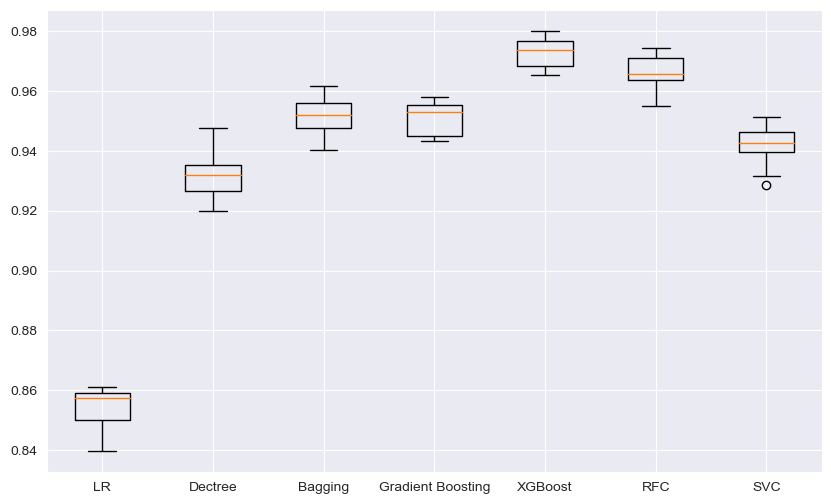

In [21]:
''' accuracy de los modelos '''
results = []
names = []
for name,model in models:
    kf = KFold(n_splits=10, shuffle=True, random_state=0)
    acc = cross_val_score(model, Xtrain,y, cv = kf)
    names.append(name)
    results.append(acc)

plt.figure(figsize=(10,6))
plt.boxplot(results)
plt.xticks(range(1,len(names)+1),names)
plt.show()

In [23]:
rf = RandomForestClassifier(random_state=99)
xgb = XGBClassifier()
gb = GradientBoostingClassifier(random_state=99)
bag = BaggingClassifier(random_state=99)
rf.fit(Xtrain,y)
xgb.fit(Xtrain,y)
gb.fit(Xtrain,y)

GradientBoostingClassifier(random_state=99)

In [24]:
df = pd.DataFrame(zip(Xtrain.columns,rf.feature_importances_), columns = ['features','rf'] )
df2 = pd.DataFrame(zip(Xtrain.columns,xgb.feature_importances_), columns = ['features','xgb'] )
df3 = pd.DataFrame(zip(Xtrain.columns,gb.feature_importances_), columns = ['features','gb'])
df = df.merge(df2, left_on= 'features', right_on='features')
df = df.merge(df3, left_on= 'features', right_on='features')
df.sort_values(by = ['gb','xgb','rf'], ascending= False)

,features,rf,xgb,gb
3,Total_Trans_Ct,0.250218,0.301370,0.560377
11,Total_Trans_Amt,0.174447,0.056884,0.150368
2,Total_Relationship_Count,0.071400,0.127722,0.091142
1,Total_Revolving_Bal,0.089690,0.073900,0.077546
12,Total_Ct_Chng_Q4_Q1,0.100431,0.041663,0.062311
7,Total_Amt_Chng_Q4_Q1,0.051832,0.024685,0.023920
9,Customer_Age,0.029697,0.027193,0.011864
10,Months_Inactive_12_mon,0.023297,0.024358,0.008420
5,Contacts_Count_12_mon,0.017390,0.021306,0.004212
8,Avg_Utilization_Ratio,0.039528,0.017101,0.003780


In [25]:
features = []
for feat in df.features:
    features.append(float(mean(df[ df['features'] == feat ].iloc[:,1:],axis=1) ) )
    #features[feat] = float(mean(df[ df['features'] == feat ].iloc[:,1:],axis=1) )
df = pd.DataFrame(zip(df.features,features) )
df.columns = ['features','mean']
df.sort_values('mean',ascending = False,inplace=True)
df

,features,mean
3,Total_Trans_Ct,0.370655
11,Total_Trans_Amt,0.127233
2,Total_Relationship_Count,0.096754
1,Total_Revolving_Bal,0.080379
12,Total_Ct_Chng_Q4_Q1,0.068135
7,Total_Amt_Chng_Q4_Q1,0.033479
9,Customer_Age,0.022918
8,Avg_Utilization_Ratio,0.020136
10,Months_Inactive_12_mon,0.018692
4,Avg_Open_To_Buy,0.016005


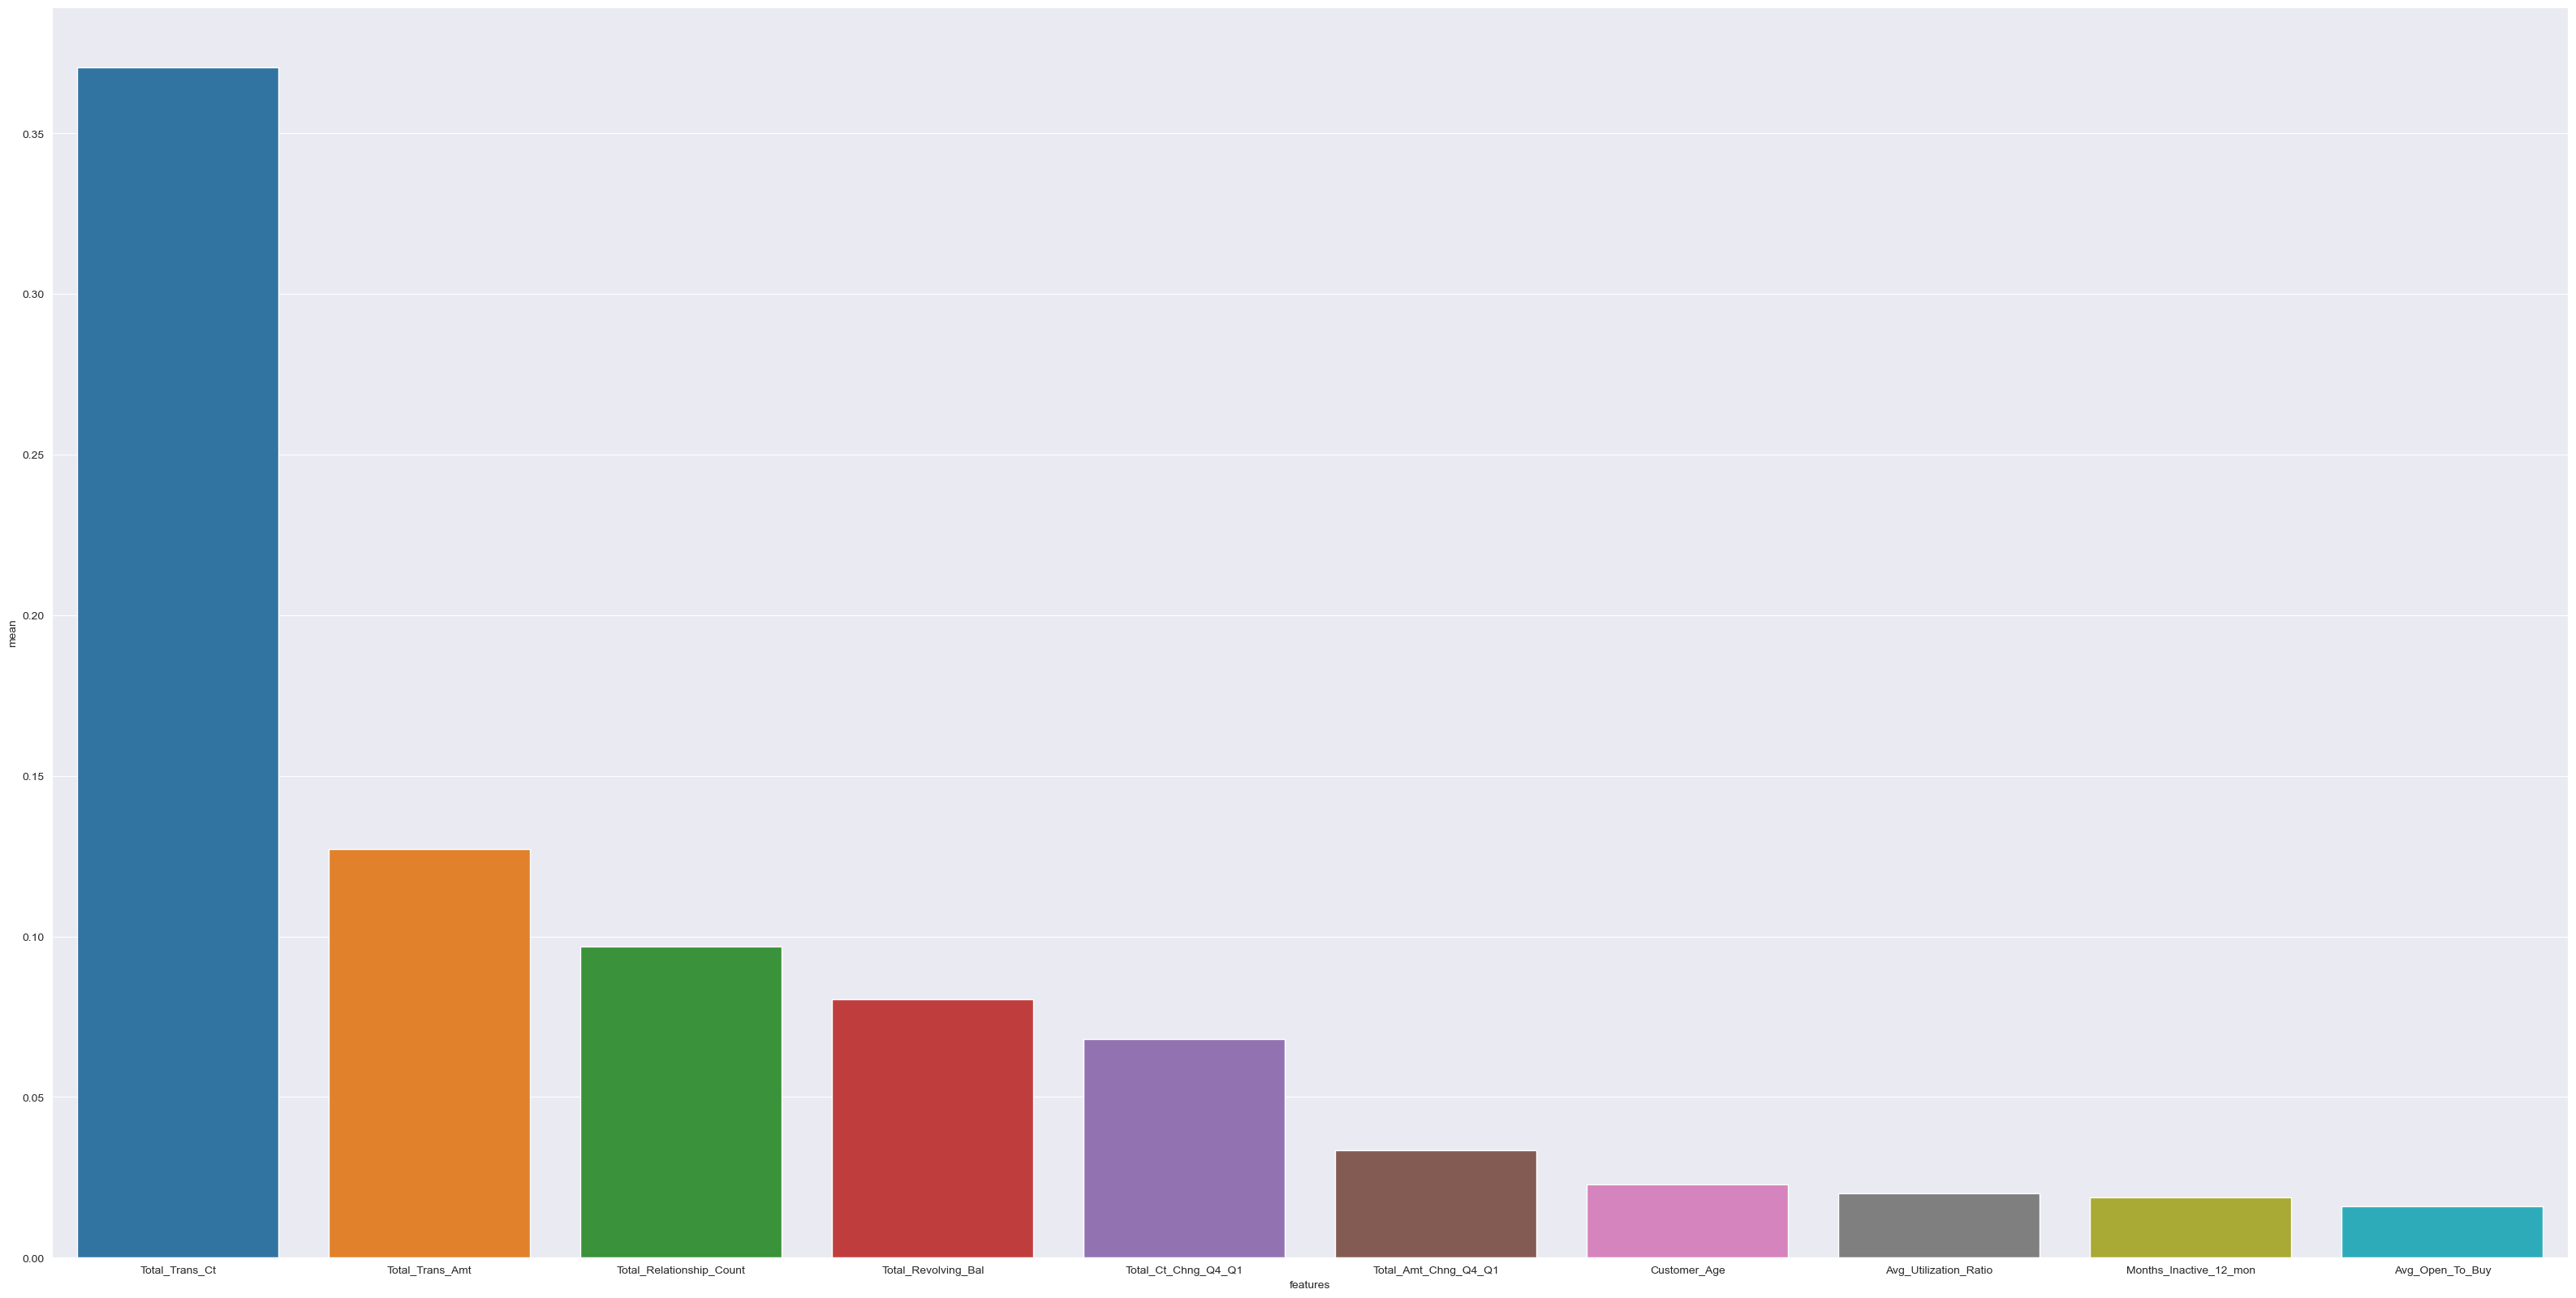

In [26]:
''' plot importancia variables'''
plt.figure(figsize=(40,20))
# cogemos sólo las más relevantes para que se vea el gráfico
sns.barplot(data = df.iloc[:10,:], x = 'features', y = 'mean' )
plt.show()

In [34]:
xgb = XGBClassifier()
parameters = {
        'learning_rate': [0.01, 0.1],
        'max_depth': [3, 5, 7, 10],
        'min_child_weight': [1, 3, 5],
        'subsample': [0.5, 0.7],
        'colsample_bytree': [0.5, 0.7],
        'n_estimators' : [100, 200, 500],
        'objective': ['reg:squarederror']
    }
grid_model = GridSearchCV(xgb, parameters, cv=kf, n_jobs=-1).fit(Xtrain,y)
grid_model.best_params_

{'colsample_bytree': 0.5,
 'learning_rate': 0.1,
 'max_depth': 7,
 'min_child_weight': 5,
 'n_estimators': 500,
 'objective': 'reg:squarederror',
 'subsample': 0.5}

In [27]:
xgb = XGBClassifier(colsample_bytree = 0.5, learning_rate = 0.1, max_depth = 7
                    ,min_child_weight = 1, n_estimators = 500 , subsample = 0.5)
mean(cross_val_score(xgb,Xtrain,ravel(y),scoring = 'accuracy',cv = kf))

0.9761799822794657

In [28]:
''' report del mejor modelo '''

xtrain,xtest,ytrain,ytest = train_test_split(Xtrain,y,test_size= 0.33)

xgb = XGBClassifier(colsample_bytree = 0.5, learning_rate = 0.1, max_depth = 7
                    ,min_child_weight = 1, n_estimators = 500 , subsample = 0.5)
xgb.fit(xtrain,ytrain)

print(classification_report(ytest, xgb.predict(xtest)))

              precision    recall  f1-score   support

           0       0.96      0.97      0.97      2281
           1       0.97      0.96      0.97      2208

    accuracy                           0.97      4489
   macro avg       0.97      0.97      0.97      4489
weighted avg       0.97      0.97      0.97      4489



In [29]:
predictions = pd.DataFrame(xgb.predict(Xtest),columns= ['target'])

predictions

,target
0,1
1,1
2,1
3,1
4,1
...,...
2021,1
2022,0
2023,1
2024,1


In [30]:
predictions.to_json(r'./Data/Results/predictions.json')